In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick
import datetime as dt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\Pandas-Data-Science-Tasks-master\all_data.csv")

# cleaning data

In [4]:
df.columns=df.columns.str.strip().str.lower().str.replace(" ","")

In [5]:
df.dropna(subset=["orderdate"],inplace=True)

In [6]:
df=df[~df.orderdate.str.contains("[a-z]",regex=True)]

In [7]:
df["new_orderdate"]=pd.to_datetime(df['orderdate'])

In [8]:
df["year"]=df.new_orderdate.dt.year
df["monthnum"]=df.new_orderdate.dt.month
df["month"]=df.new_orderdate.dt.month_name()
df["day"]=df.new_orderdate.dt.day_name()
df["hour"]=df.new_orderdate.dt.hour
df["date"]=df.new_orderdate.dt.date
df[["quantityordered","priceeach"]]=df[["quantityordered","priceeach"]].astype(float)
df["sales"]=df.priceeach*df.quantityordered

In [11]:
df=df.loc[:,~df.columns.isin(["orderdate"])]
df=df[df.year!=2020]


In [13]:
df.head()

,orderid,product,quantityordered,priceeach,purchaseaddress,new_orderdate,year,monthnum,month,day,hour,date,sales
0,176558,USB-C Charging Cable,2.0,11.95,"917 1st St, Dallas, TX 75001",2019-04-19 08:46:00,2019,4,April,Friday,8,2019-04-19,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,"682 Chestnut St, Boston, MA 02215",2019-04-07 22:30:00,2019,4,April,Sunday,22,2019-04-07,99.99
3,176560,Google Phone,1.0,600.00,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,2019,4,April,Friday,14,2019-04-12,600.00
4,176560,Wired Headphones,1.0,11.99,"669 Spruce St, Los Angeles, CA 90001",2019-04-12 14:38:00,2019,4,April,Friday,14,2019-04-12,11.99
5,176561,Wired Headphones,1.0,11.99,"333 8th St, Los Angeles, CA 90001",2019-04-30 09:27:00,2019,4,April,Tuesday,9,2019-04-30,11.99


# plot sales in quantity and money for the entire period

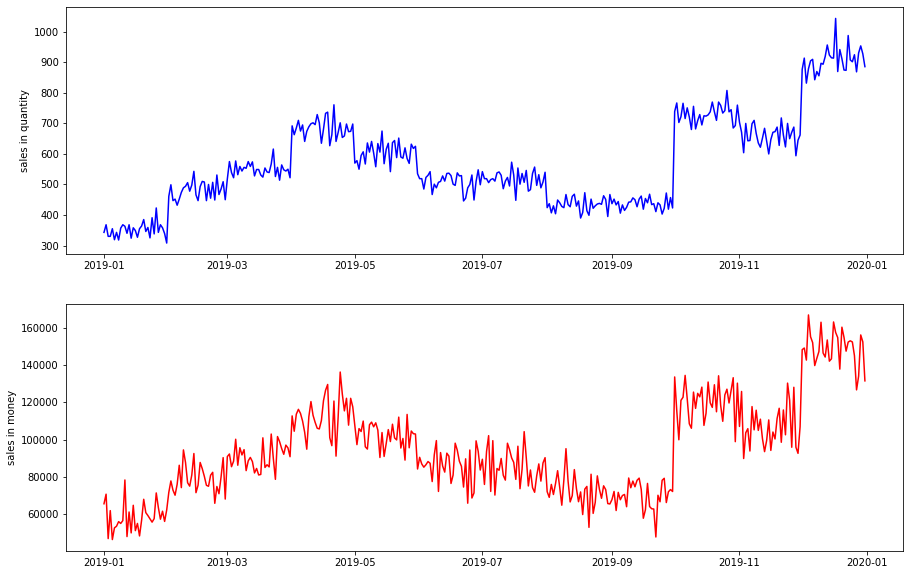

In [10]:
g=df[df.year!=2020].groupby("date").agg({"quantityordered":"sum","sales":"sum"}).reset_index().sort_values("date")
fig,axes=plt.subplots(2,1,figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(g.date,g.quantityordered,color="b")
plt.ylabel("sales in quantity")
plt.subplot(2,1,2)
plt.plot(g.date,g.sales,color="r")
plt.ylabel("sales in money")
plt.show()

# sales by month

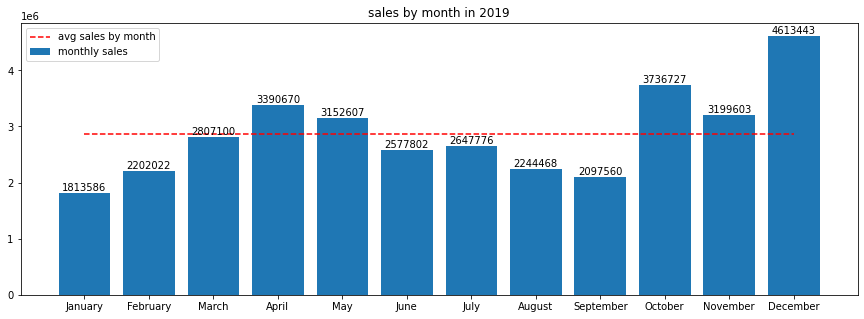

posx and posy should be finite values
posx and posy should be finite values


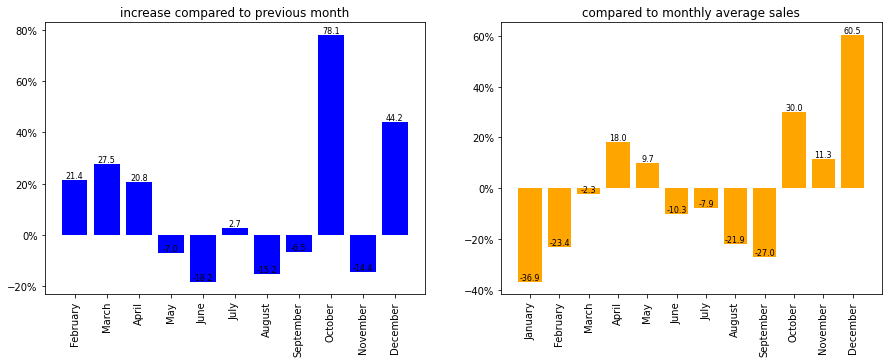

In [75]:
g=df.groupby(["month","monthnum"])["sales"].sum().reset_index().sort_values("monthnum")
g["average"]=g.sales.mean()
g["prev_month_sales"]=g.sales.shift(1)
g["increase_vs_prev_month"]=((g.sales-g.prev_month_sales)/g.prev_month_sales*100).round(1)
g["vs_avg_monthly_sales"]=(g.sales/g.average*100-100).round(1)


plt.figure(figsize=(15,5))
plt.bar(g.month,g.sales,label="monthly sales")
plt.plot(g.month,g.average,color="r",ls="--",label="avg sales by month")
plt.title("sales by month in 2019")
plt.legend()
def value_label(x,y):
    for i in range(len(x)):
        plt.text(i,round(y.iloc[i]),round(y.iloc[i]),size=10,ha="center",va="bottom",rotation=0)
value_label(g.month,g.sales)

fig,axes=plt.subplots(2,1,figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(g.month,g.increase_vs_prev_month,color="b")
plt.title("increase compared to previous month")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.xticks(rotation=90)
def value_label(x,y):
    for i in range(len(x)):
        plt.text(i,(y.iloc[i]),(y.iloc[i]),size=8,ha="center",va="bottom",rotation=0)
value_label(g.month,g.increase_vs_prev_month)
plt.subplot(1,2,2)
plt.bar(g.month,g.vs_avg_monthly_sales,color="orange")
plt.title("compared to monthly average sales")
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(100))
plt.xticks(rotation=90)
def value_label(x,y):
    for i in range(len(x)):
        plt.text(i,(y.iloc[i]),(y.iloc[i]),size=8,ha="center",va="bottom",rotation=0)
value_label(g.month,g.vs_avg_monthly_sales)
plt.show()

# most sales by product for every month

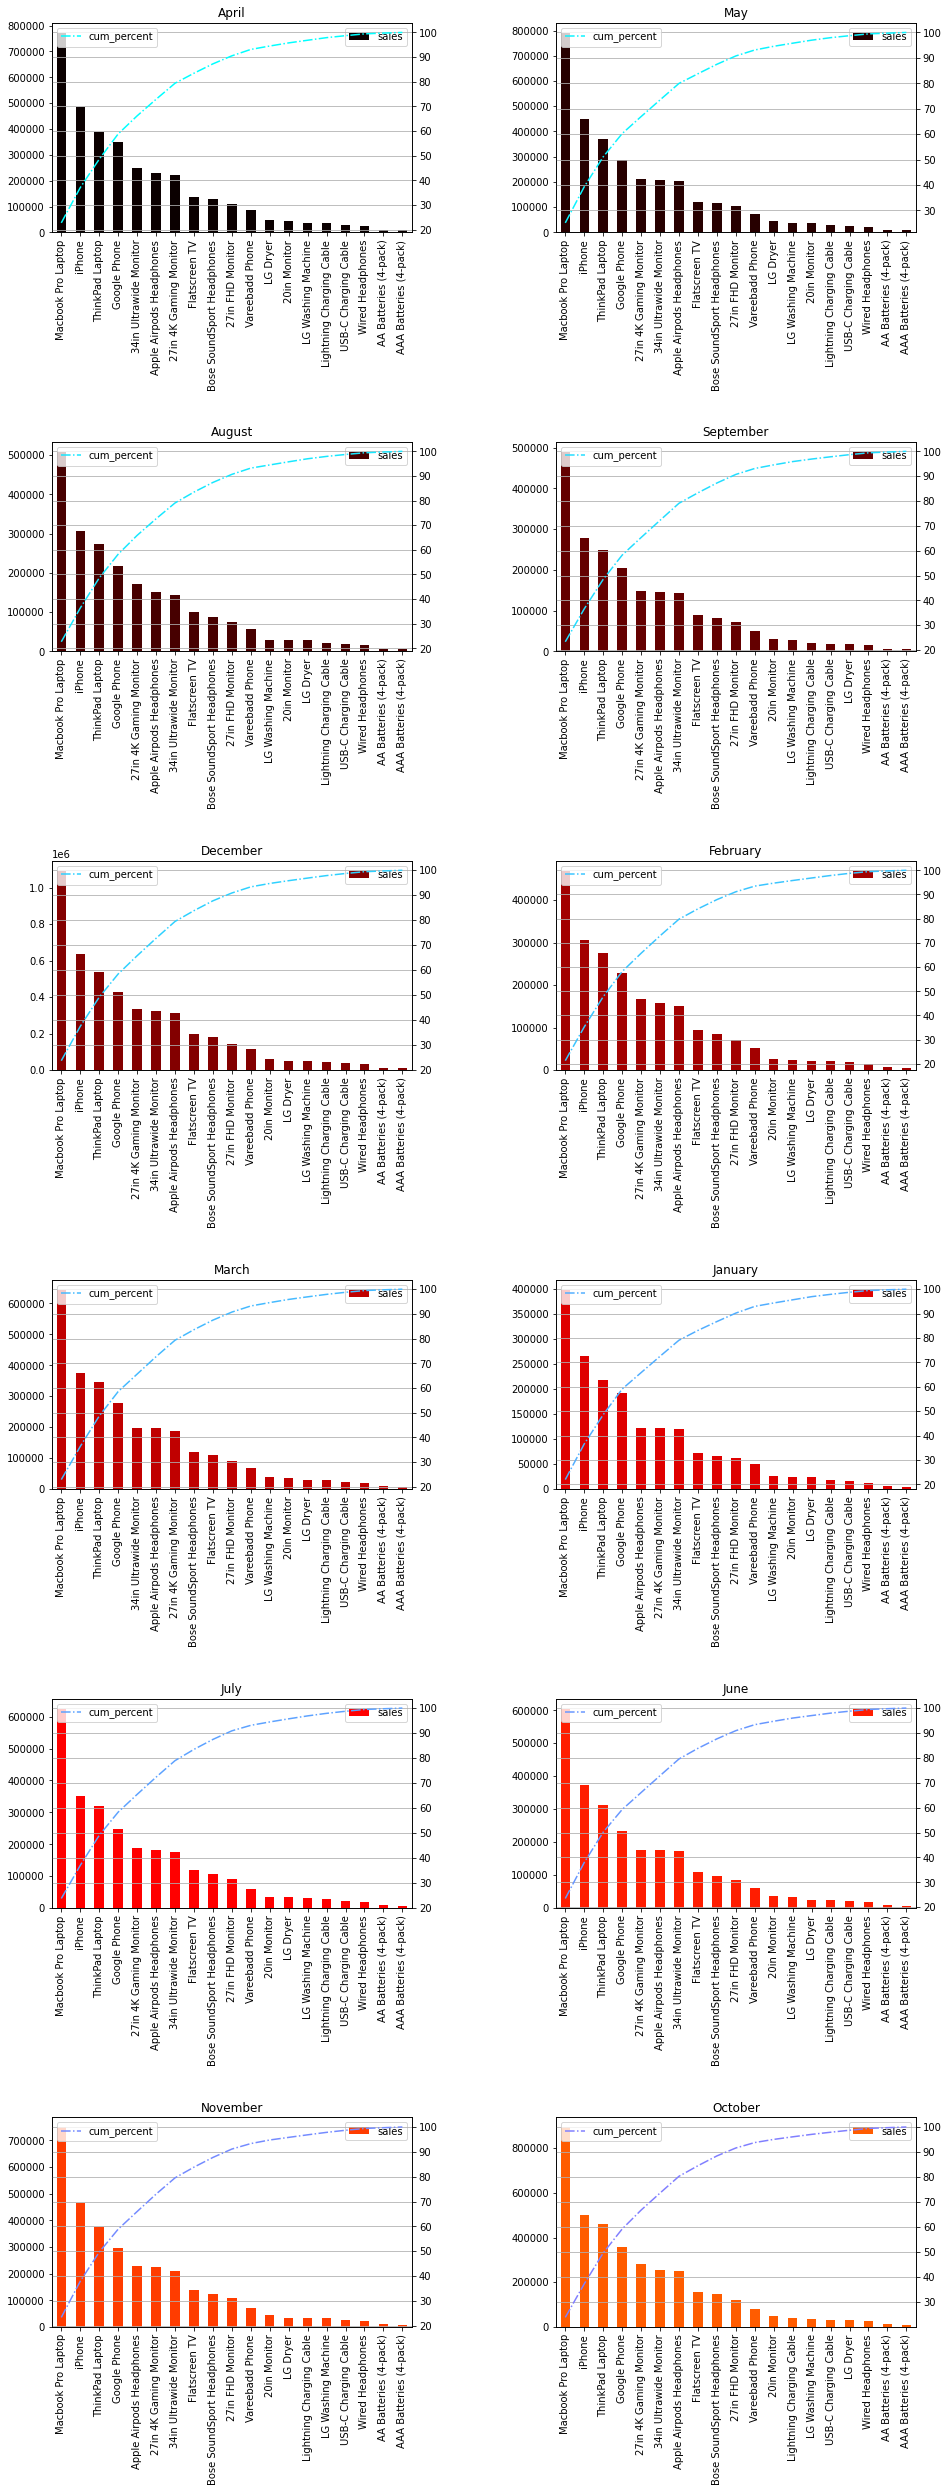

In [17]:
fig,axes=plt.subplots(6,2,figsize=(15,40))
cmap1=plt.get_cmap("hot")
cmap2=plt.get_cmap("cool")
colors1= list(cmap1(np.linspace(0, 0.5, len(df["month"].unique()))))
colors2= list(cmap2(np.linspace(0, 0.5, len(df["month"].unique()))))
for ax,m,c1,c2 in zip(axes.ravel(),df["month"].unique(),colors1,colors2):
    g=df[(df.year!=2020)&(df.month==m)].groupby(["product"])["sales"].sum().reset_index().sort_values("sales",ascending=False)
    g["percent"]=(g.sales/g.sales.sum()*100).round(2)
    g["cum_percent"]=g.percent.cumsum()
    g.plot(kind="bar",x="product",y="sales",title=m,ax=ax,color=c1,xlabel="")
    ax2=ax.twinx()
    g.plot(kind="line",x="product",y="cum_percent",ax=ax2,color=c2,ls="-.",grid="yaxis")
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=1)
plt.show()

# most sales by hour for every month

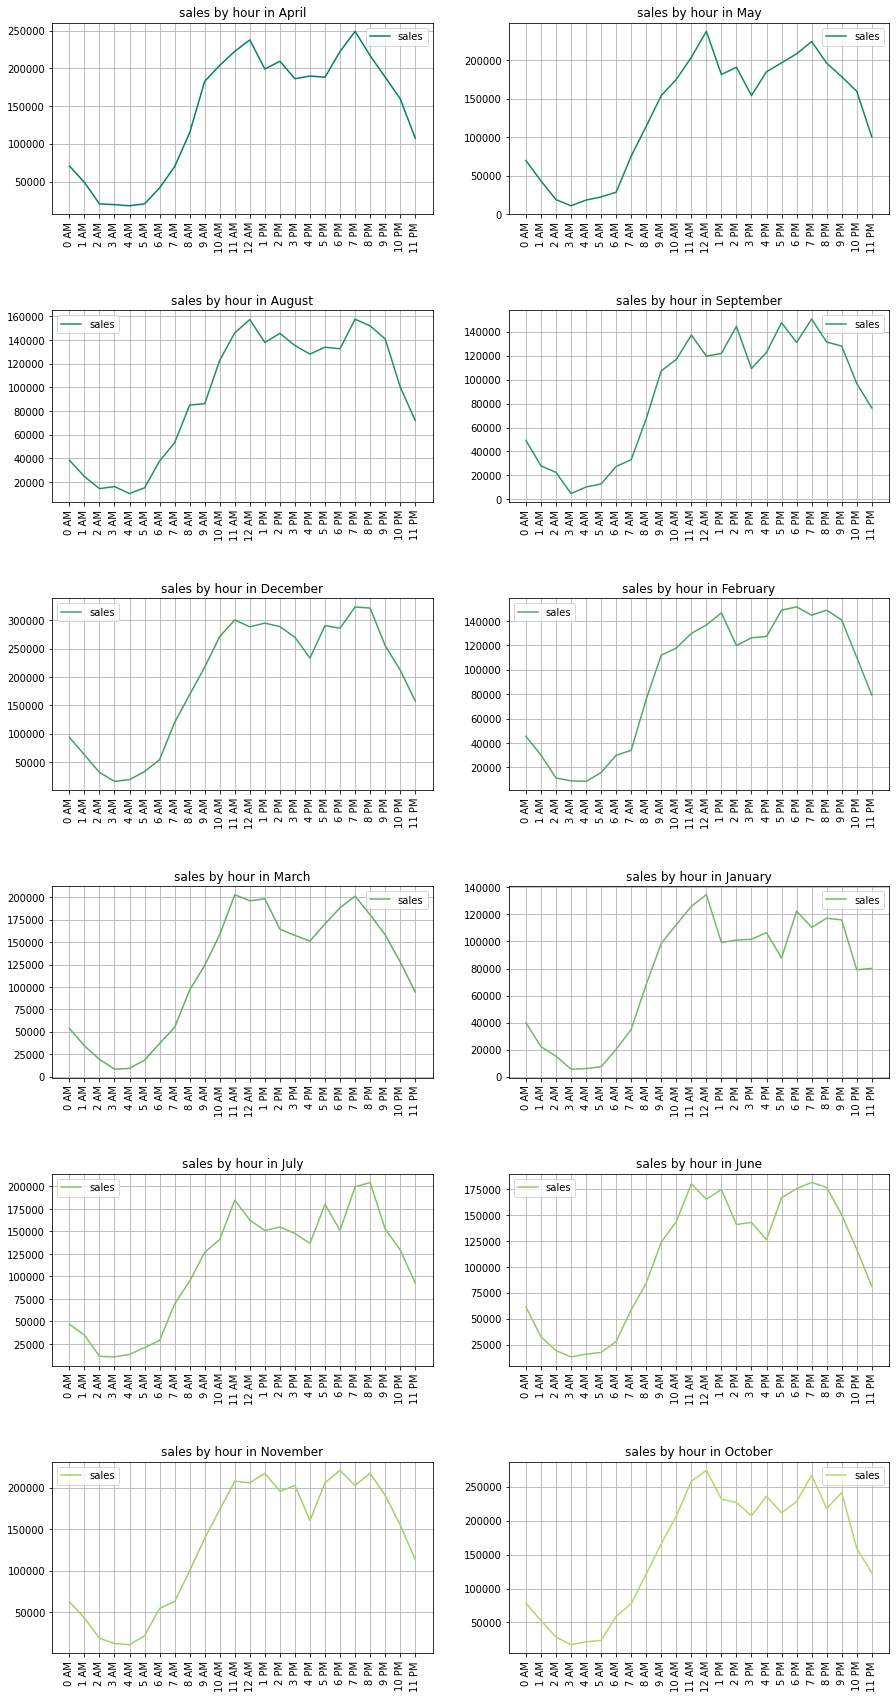

In [83]:
fig,axes=plt.subplots(6,2,figsize=(15,30))
cmap=plt.get_cmap("summer")
colors=list(cmap(np.linspace(0,0.7,len(df.month.unique()))))
for ax,m,col in zip(axes.ravel(),df["month"].unique(),colors):
    g=df[df.month==m].groupby("hour")["sales"].sum().reset_index()
    g["hours"]=[str(h)+" AM" if int(h)<=12 else str(h-12)+" PM" for h in g.hour ]
    g.plot(kind="line",ax=ax,x="hours",y="sales",title=("sales by hour in "+str(m)),grid=True,xticks=g.hour,rot=90,color=col,xlabel="")
    plt.subplots_adjust(hspace=0.5)
plt.show()

# which products generate most sales in different cities

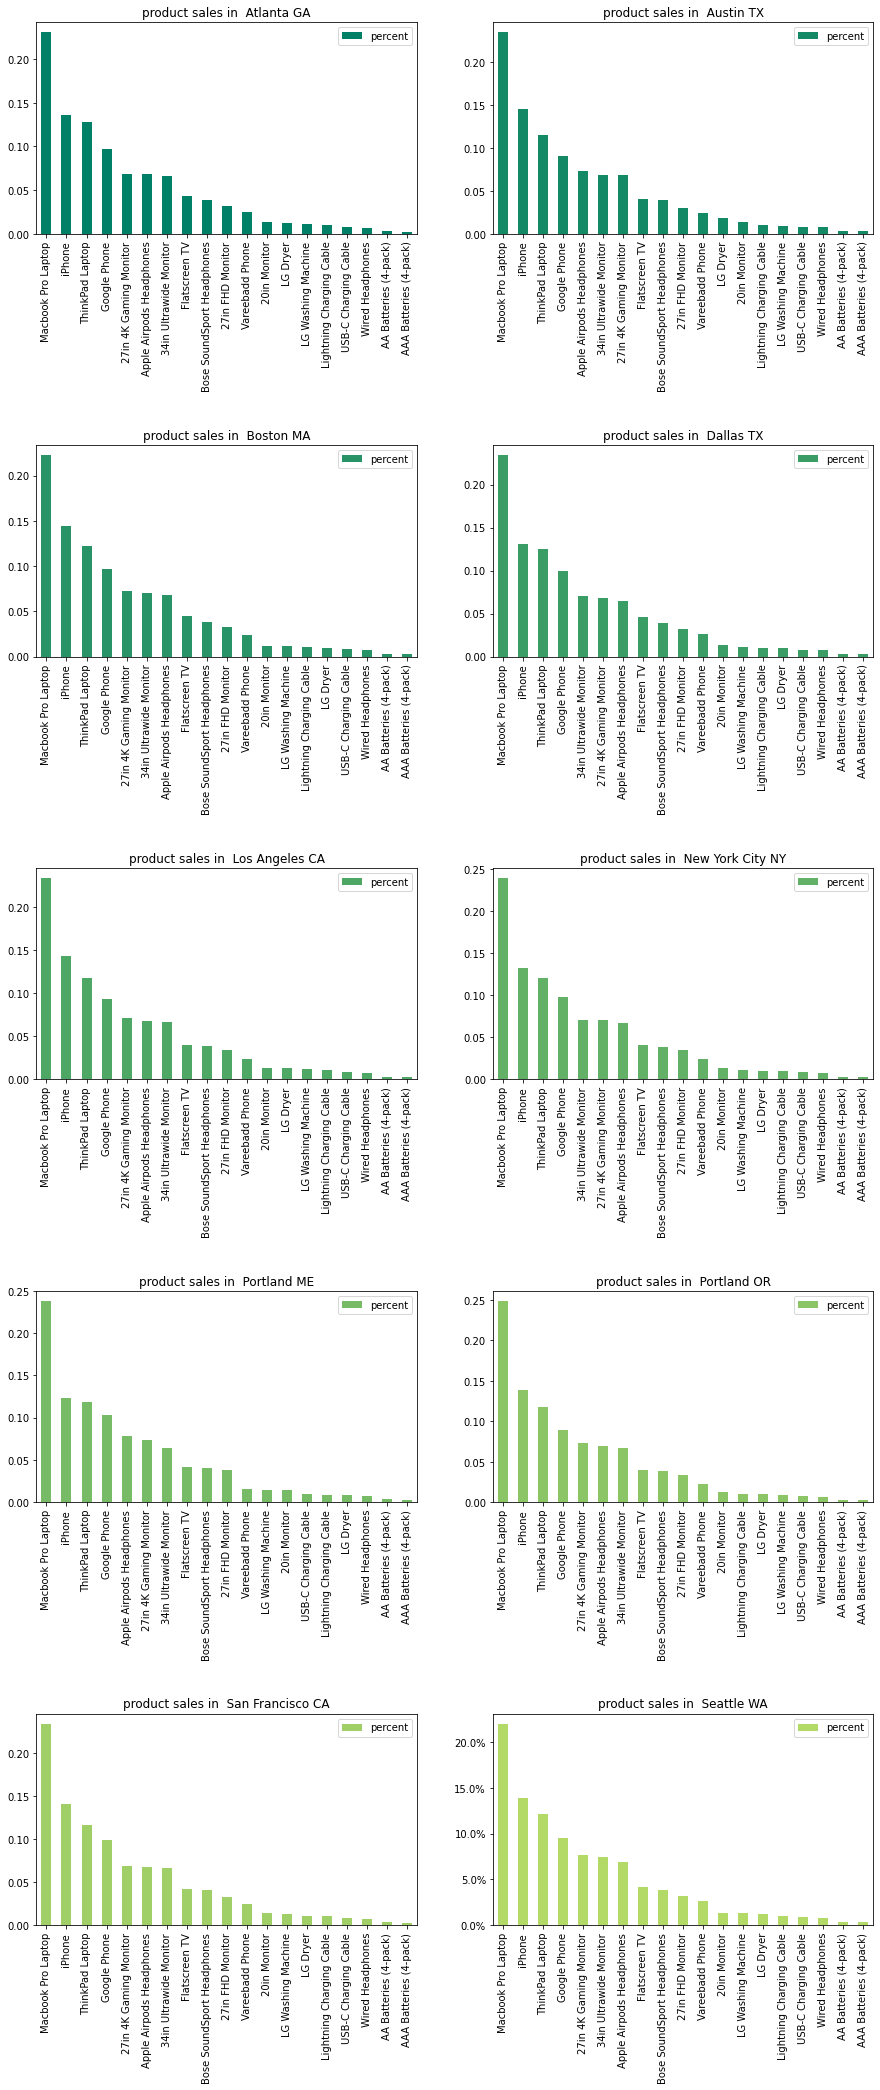

In [78]:
df["city"]=df["purchaseaddress"].apply(lambda x:x.split(",")[1]+x.split(",")[2][:3])

fig,axes=plt.subplots(5,2,figsize=(15,35))
cmap=plt.get_cmap("summer")
colors=list(cmap(np.linspace(0,0.7,len(df.city.unique()))))
for ax,c,col in zip(axes.ravel(),sorted(df.city.unique()),colors):
    g=df[df.city==c].groupby('product')["sales"].sum().reset_index().sort_values("sales",ascending=False)
    g["percent"]=g.sales/g.sales.sum()
    g.plot(kind="bar",ax=ax,x="product",y="percent",title="product sales in "+c,xlabel="",color=col)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
    plt.subplots_adjust(hspace=1)
plt.show()

# what products are most often sold together?

In [148]:
newdf=df[df.orderid.duplicated(keep=False)].sort_values("orderid")
newdf["products"]=newdf.groupby("orderid")["product"].transform(lambda x:",".join(x))
#newdf.drop_duplicates(subset=["orderid","products"])
newdf2=newdf[newdf[["orderid","products"]].duplicated(keep="first")]
newdf2


from itertools import combinations
from collections import Counter
mycounter=Counter()


for row in newdf2["products"]:
    row_list=row.split(",")
    mycounter.update(Counter(combinations(row_list,2)))
for key,value in mycounter.most_common(10):
    print(key,value)

('Google Phone', 'USB-C Charging Cable') 881
('iPhone', 'Lightning Charging Cable') 868
('iPhone', 'Wired Headphones') 423
('Google Phone', 'Wired Headphones') 389
('iPhone', 'Apple Airpods Headphones') 333
('Vareebadd Phone', 'USB-C Charging Cable') 305
('Lightning Charging Cable', 'iPhone') 278
('USB-C Charging Cable', 'Google Phone') 260
('USB-C Charging Cable', 'Wired Headphones') 218
('Google Phone', 'Bose SoundSport Headphones') 210
